In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

# Download 'movie_reviews' corpus
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


True

In [4]:
import pandas as pd
df = pd.read_csv("movie_reviews.csv")

In [2]:
sent_token = sent_tokenize(movie_reviews.raw('pos/cv000_29590.txt'))

In [ ]:
sample = sen

In [3]:
print("First five sentences:")
for i in range(5):
    print(sent_token[i])


First five sentences:
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .
in other words , don't dismiss this film because of its source .


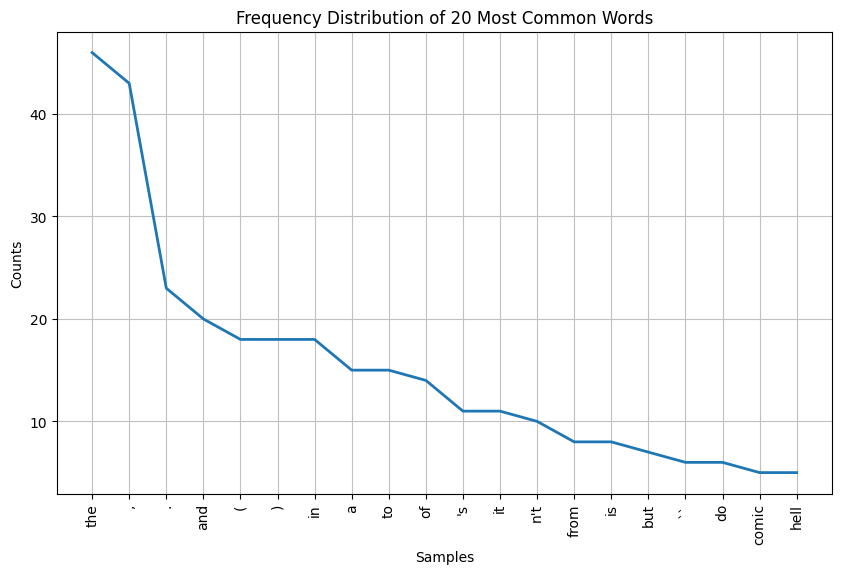

<Axes: title={'center': 'Frequency Distribution of 20 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [5]:
word_tokens = word_tokenize(movie_reviews.raw('pos/cv000_29590.txt'))

# Frequency distribution of words
fdist = FreqDist(word_tokens)

# Plot the frequency distribution of the 20 most common words
plt.figure(figsize=(10, 6))
fdist.plot(20, title="Frequency Distribution of 20 Most Common Words", cumulative=False)


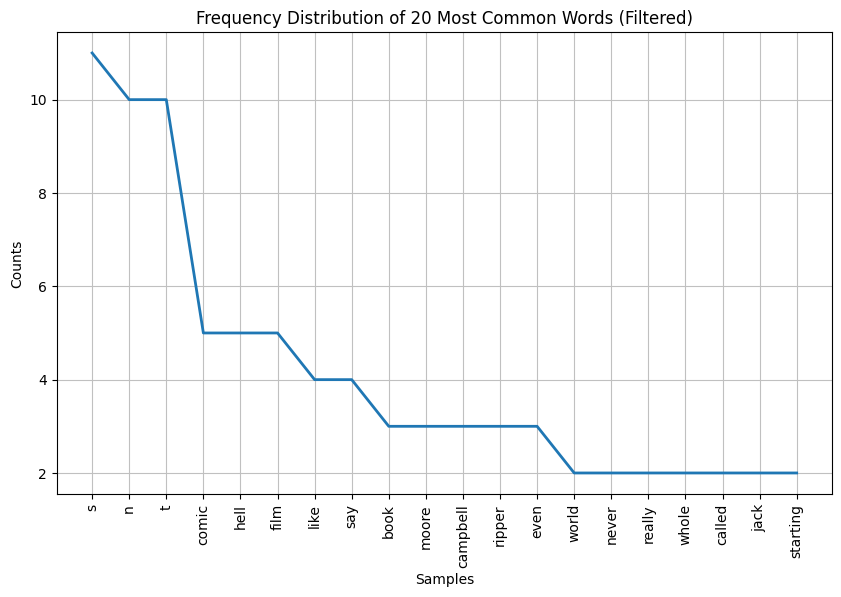

In [6]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words]

# Remove punctuation using RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
filtered_words = tokenizer.tokenize(' '.join(filtered_words))

# Frequency distribution of filtered words
fdist_filtered = FreqDist(filtered_words)

# Plot the frequency distribution of the 20 most common words after removing stopwords and punctuation
plt.figure(figsize=(10, 6))
fdist_filtered.plot(20, title="Frequency Distribution of 20 Most Common Words (Filtered)", cumulative=False)
plt.show()

Bigrams, Trigrams, and N-grams

In [8]:
from nltk.util import ngrams

file_path = nltk.data.find('corpora/movie_reviews/neg/cv009_29417.txt')
with open(file_path, 'r') as file:
    text = file.read()
tokens = word_tokenize(text)

In [9]:
filtered_words = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 2]

# Find bigrams
bigrams = list(ngrams(filtered_words, 2))

# Find trigrams
trigrams = list(ngrams(filtered_words, 3))

# Find n-grams with five words
five_grams = list(ngrams(filtered_words, 5))

# Calculate frequency distributions
fdist_bigrams = FreqDist(bigrams)
fdist_trigrams = FreqDist(trigrams)
fdist_five_grams = FreqDist(five_grams)

# Print the 20 most common bigrams
print("20 Most Common Bigrams:")
print(fdist_bigrams.most_common(20))

# Print the 20 most common trigrams
print("\n20 Most Common Trigrams:")
print(fdist_trigrams.most_common(20))

# Print the 20 most common n-grams with five words
print("\n20 Most Common Five-grams:")
print(fdist_five_grams.most_common(20))

20 Most Common Bigrams:
[(('tim', 'roth'), 2), (('justin', 'chambers'), 2), (("n't", 'cut'), 2), (('plot', 'young'), 1), (('young', 'french'), 1), (('french', 'boy'), 1), (('boy', 'sees'), 1), (('sees', 'parents'), 1), (('parents', 'killed'), 1), (('killed', 'eyes'), 1), (('eyes', 'tim'), 1), (('roth', 'oops'), 1), (('oops', 'mean'), 1), (('mean', 'evil'), 1), (('evil', 'man'), 1), (('man', 'vows'), 1), (('vows', 'revenge'), 1), (('revenge', 'man'), 1), (('man', 'taught'), 1), (('taught', 'ways'), 1)]

20 Most Common Trigrams:
[(('plot', 'young', 'french'), 1), (('young', 'french', 'boy'), 1), (('french', 'boy', 'sees'), 1), (('boy', 'sees', 'parents'), 1), (('sees', 'parents', 'killed'), 1), (('parents', 'killed', 'eyes'), 1), (('killed', 'eyes', 'tim'), 1), (('eyes', 'tim', 'roth'), 1), (('tim', 'roth', 'oops'), 1), (('roth', 'oops', 'mean'), 1), (('oops', 'mean', 'evil'), 1), (('mean', 'evil', 'man'), 1), (('evil', 'man', 'vows'), 1), (('man', 'vows', 'revenge'), 1), (('vows', 'reve

PorterStemmer & WordNetLemmatizer

In [10]:
from nltk.stem import PorterStemmer, WordNetLemmatizer


file_path = nltk.data.find('corpora/movie_reviews/neg/cv013_10494.txt')
with open(file_path, 'r') as file:
    text = file.read()
tokens = word_tokenize(text)

# Remove stopwords and filter words with length > 2
filtered_words = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 2]


top20 = filtered_words[:20]

# Initialize stemmer and lemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Print stemmed and lemmatized versions 
print("Stemmed Version:")
for word in top20:
    print(porter.stem(word))

print("\nLemmatized Version:")
for word in top20:
    print(lemmatizer.lemmatize(word))

Stemmed Version:
movi
like
mortal
kombat
annihil
work
must
review
multipl
level
first
rampant
usag
randian
subtext
pervad
entir
movi
occasionali
almost

Lemmatized Version:
movie
like
mortal
kombat
annihilation
work
must
reviewed
multiple
level
first
rampant
usage
randian
subtext
pervades
entire
movie
occasionaly
almost


POS Ttagging and NER

In [13]:
import nltk
nltk.download('shakespeare')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from bs4 import BeautifulSoup

# Import words from the file
file_path = nltk.data.find('corpora/movie_reviews/neg/cv018_21672.txt')
with open(file_path, 'r') as file:
    text = file.read()
tokens = word_tokenize(text)

# Print first 20 words with POS tags
print("First 20 words with POS tags:")
print(pos_tag(tokens)[:20])



file_path = nltk.data.find('corpora/shakespeare/dream.xml')
with open(file_path, 'r') as file:
    xml_text = file.read()
soup = BeautifulSoup(xml_text, 'xml')
sample = soup.get_text()

# Tokenize sentences
sentences = sent_tokenize(sample)

# Tokenize words and perform POS tagging
ner_tags = []
for sentence in sentences:
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    ner_tags.extend(tagged_words)

# Perform NER tagging
named_entities = ne_chunk(ner_tags)

# Print named entities
print("\nNamed Entities:")
print(named_entities)


[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\PRASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


First 20 words with POS tags:
[('the', 'DT'), ('law', 'NN'), ('of', 'IN'), ('crowd', 'JJ'), ('pleasing', 'VBG'), ('romantic', 'JJ'), ('movies', 'NNS'), ('states', 'VBZ'), ('that', 'IN'), ('the', 'DT'), ('two', 'CD'), ('leads', 'NNS'), ('must', 'MD'), ('end', 'VB'), ('up', 'RP'), ('together', 'RB'), ('by', 'IN'), ('film', 'NN'), ("'s", 'POS'), ('end', 'NN')]

Named Entities:
(S
  A/DT
  (ORGANIZATION Midsummer/NNP Night/NNP)
  's/POS
  (PERSON Dream/NNP Dramatis/NNP Personae/NNP THESEUS/NNP)
  ,/,
  (ORGANIZATION Duke/NNP)
  of/IN
  (GPE Athens/NNP)
  ./.
  EGEUS/NNP
  ,/,
  father/NN
  to/TO
  (GPE Hermia/NNP)
  ./.
  (ORGANIZATION LYSANDER/NNP)
  DEMETRIUS/NNP
  in/IN
  love/NN
  with/IN
  (PERSON Hermia/NNP)
  ./.
  (ORGANIZATION PHILOSTRATE/NN)
  ,/,
  master/NN
  of/IN
  the/DT
  revels/NNS
  to/TO
  Theseus/NNP
  ./.
  (ORGANIZATION QUINCE/NNP)
  ,/,
  a/DT
  carpenter/NN
  ./.
  (ORGANIZATION SNUG/NNP)
  ,/,
  a/DT
  joiner/NN
  ./.
  (ORGANIZATION BOTTOM/NNP)
  ,/,
  a/DT
  weav

Perform the following operations using spaCy:

In [14]:
import spacy
from spacy import displacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Import text file from movie_reviews corpus
file_path = nltk.data.find('corpora/movie_reviews/neg/cv018_21672.txt')
with open(file_path, 'r') as file:
    text = file.read()

# Process text with spaCy
doc = nlp(text)

# Print tokenized words
print("Tokenized words:")
for token in doc:
    print(token.text)

# Print tokenized words and their lemmas
print("\nTokenized words with their lemmas:")
for token in doc:
    print(token.text, token.lemma_)

# Print tokenized words and their POS tags
print("\nTokenized words with their POS tags:")
for token in doc:
    print(token.text, token.pos_)

# Import text file from shakespeare corpus
file_path = nltk.data.find('corpora/shakespeare/dream.xml')
with open(file_path, 'r') as file:
    xml_text = file.read()
soup = BeautifulSoup(xml_text, 'xml')
sample = soup.get_text()

# Process text with spaCy
doc = nlp(sample)

# Print named entities
print("\nNamed Entities:")
for entity in doc.ents:
    print(entity.text, entity.label_)


Tokenized words:
the
law
of
crowd
pleasing
romantic
movies
states
that
the
two
leads
must
end
up
together
by
film
's
end
.


if
you
're
not
familiar
with
this
law
,
then
maybe
you
've
seen
the
trailer
for
this
film
which
shows
that
the
two
leads
are
together
by
film
's
end
.


now
if
you
're
a
regular
reader
of
mine
,
you
've
heard
me
say
this
countless
times
:
you
know
how
drive
me
crazy
is
going
to
end
,
but
is
the
journey
to
get
to
that
ending
worth
it
?


no
,
it
definitely
is
not
.


melissa
joan
hart
(
from
abc
's
"
sabrina
,
the
teenage
witch
"
)
likes
a
hunky
stud
on
the
basketball
team
.


adrien
grenier
is
her
grungy
neighbor
who
's
just
broken
up
with
his
activist
girlfriend
.


apparently
he
wants
to
make
his
ex
-
girlfriend
jealous
enough
to
take
him
back
,
and
she
wants
someone
to
take
her
to
the
big
year
end
dance
.


so
the
two
pretend
to
date
for
some
reason
,
but
only
after
hart
gives
grenier
a
bath
to
turn
him
into
a
hunky
stud
.


will
grenier
like
his
new
popularit

Chunking and Chinking

In [15]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import movie_reviews
from nltk.chunk import RegexpParser

# Import text file from movie_reviews corpus
file_path = nltk.data.find('corpora/movie_reviews/pos/cv028_26746.txt')
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize sentences
sents = sent_tokenize(text)

# Tokenize words in the first sentence
words = word_tokenize(sents[0])

# Filter out words with length less than 2 characters
filtertop1 = [word for word in words if len(word) >= 2]

# Define chunk grammar
chunk_grammar = r"""
    NP: {<DT|JJ|NN.*>+}          
    VP: {<VB.*><NP|PP|CLAUSE>+$}  
"""

# Create chunk parser
chunk_parser = RegexpParser(chunk_grammar)

# Chunk and draw parse tree for noun phrases, verbs, and verb phrases
print("Chunking noun phrases, verbs, and verb phrases:")
chunked_tree = chunk_parser.parse(nltk.pos_tag(filtertop1))
chunked_tree.pretty_print()

# Define chink grammar
chink_grammar = r"""
    VP: {<.*>+}  
    <VB.*>: {<.*>+}
"""

# Create chink parser
chink_parser = RegexpParser(chink_grammar)

# Chink and draw parse tree for every word except verb phrases
print("\nChinking every word except verb phrases:")
chinked_tree = chink_parser.parse(nltk.pos_tag(filtertop1))
chinked_tree.pretty_print()


Chunking noun phrases, verbs, and verb phrases:
                                                                                                                                            S                                                                                                                                                          
   _________________________________________________________________________________________________________________________________________|____________________________________________________________________________________________________________________________________________________       
  |     |      |        |        |      |      |         |            |         |      |          |         |      |        |       |       |      |       |                NP                                    NP                    NP            NP                      NP                 NP    
  |     |      |        |        |      |      |         |     

Context-Free Grammar

In [16]:
import nltk

# Define the context-free grammar
cfg_rules = """
    S -> NP VP
    NP -> Det Nom | PropN
    Nom -> Adj Nom | N
    VP -> V Adj | V NP | V S | V NP PP
    PP -> P NP
    
    PropN -> 'Buster' | 'Chatterer' | 'Joe'
    Adj -> 'angry' | 'frightened' | 'little' | 'tall'
    Det -> 'a' | 'the'
    N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
    V -> 'chased' | 'saw' | 'said' | 'thought' | 'was' | 'put'
    P -> 'on'
"""


cfg_parser = nltk.ChartParser(nltk.CFG.fromstring(cfg_rules))

# Parse the sentence
sentence = "Joe saw a squirrel on the tree"
tokens = nltk.word_tokenize(sentence)
parse_trees = cfg_parser.parse(tokens)

# Print parse trees
for tree in parse_trees:
    print(tree)
    tree.pretty_print()


(S
  (NP (PropN Joe))
  (VP
    (V saw)
    (NP (Det a) (Nom (N squirrel)))
    (PP (P on) (NP (Det the) (Nom (N tree))))))
       S                                   
   ____|_____________                       
  |                  VP                    
  |     _____________|__________            
  |    |       |                PP         
  |    |       |             ___|___        
  |    |       NP           |       NP     
  |    |    ___|_____       |    ___|___    
  NP   |   |        Nom     |   |      Nom 
  |    |   |         |      |   |       |   
PropN  V  Det        N      P  Det      N  
  |    |   |         |      |   |       |   
 Joe  saw  a      squirrel  on the     tree



CountVectorizer 


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd


file_path = nltk.data.find('corpora/movie_reviews/neg/cv048_18380.txt')
with open(file_path, "r") as file:
    text = file.read()

# Tokenize the sentences
sents = nltk.sent_tokenize(text)

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the text
bagofwords = vectorizer.fit_transform(sents)

# Convert bag of words to numpy array
bagofwords_array = bagofwords.toarray()

# Print bag of words as numpy array
print(bagofwords_array)

# Print feature names
print(vectorizer.get_feature_names_out())

# Convert bag of words to pandas DataFrame
bagofwords_df = pd.DataFrame(bagofwords_array, columns=vectorizer.get_feature_names_out())

# Print bag of words as pandas DataFrame
print(bagofwords_df)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['1992' 'about' 'actions' 'actors' 'actress' 'all' 'almost' 'also' 'among'
 'an' 'and' 'andrzej' 'angry' 'any' 'are' 'ariel' 'as' 'at' 'atmosphere'
 'attempt' 'audience' 'author' 'avrech' 'bad' 'bartkowiak' 'battling' 'be'
 'because' 'becomes' 'belonged' 'belongs' 'better' 'bosses' 'bride' 'but'
 'by' 'cabalistic' 'can' 'case' 'category' 'certain' 'charming'
 'colliding' 'community' 'complicated' 'concluding' 'convincing' 'cop'
 'creates' 'crime' 'culture' 'decades' 'decides' 'depressed' 'develops'
 'director' 'during' 'easy' 'eden' 'educate' 'effectively' 'emily'
 'enthusiasm' 'eric' 'even' 'extent' 'feelings' 'fighter' 'film' 'films'
 'first' 'flaw' 'followed' 'for' 'formula' 'formulaic' 'from' 'gangsters'
 'get' 'give' 'go' 'got' 'greatest' 'griffith' 'guys' 'hamper' 'hand'
 'happens' 'hassidic' 'he' 'help' 'her' 'heroine' 'herring' 'his' 'hurt'
 'important' 'in' '

TfidfVectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


bagofwords = tfidf_vectorizer.fit_transform(sents)


bagofwords_array = bagofwords.toarray()


print(bagofwords_array)

# Print feature names
print(tfidf_vectorizer.get_feature_names_out())

# Convert bag of words to pandas DataFrame
bagofwords_df = pd.DataFrame(bagofwords_array, columns=tfidf_vectorizer.get_feature_names_out())


print(bagofwords_df)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.36302294 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['1992' 'about' 'actions' 'actors' 'actress' 'all' 'almost' 'also' 'among'
 'an' 'and' 'andrzej' 'angry' 'any' 'are' 'ariel' 'as' 'at' 'atmosphere'
 'attempt' 'audience' 'author' 'avrech' 'bad' 'bartkowiak' 'battling' 'be'
 'because' 'becomes' 'belonged' 'belongs' 'better' 'bosses' 'bride' 'but'
 'by' 'cabalistic' 'can' 'case' 'category' 'certain' 'charming'
 'colliding' 'community' 'complicated' 'concluding' 'convincing' 'cop'
 'creates' 'crime' 'culture' 'decades' 'decides' 'depressed' 'develops'
 'director' 'during' 'easy' 'eden' 'educate' 'effect

MultinomialNB

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import re


df = pd.read_csv('movie_reviews.csv')
print("Shape of df:", df.shape)


print(df.head())

# iii. Remove special characters and single characters and lemmatize words
documents = []
for text in df['text']:
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    documents.append(text.lower())

# iv. Print the first element of the documents list
print(documents[0])

X_train, X_test, y_train, y_test = train_test_split(documents, df['tag'], test_size=0.2, random_state=42)

# vi. Initialize CountVectorizer object
count_vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)

# vii. Fit and transform training set and transform test set
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# viii. Initialize TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)

# ix. Fit and transform training set and transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# x. Train MultinomialNB classifier using count_train and training labels
nb_count = MultinomialNB()
nb_count.fit(count_train, y_train)

# xi. Predict values on count_test
count_pred = nb_count.predict(count_test)

# xii. Print accuracy of predictions
print("Accuracy using CountVectorizer:", accuracy_score(y_test, count_pred))

# xiii. Build confusion matrix
print("Confusion Matrix using CountVectorizer:")
print(confusion_matrix(y_test, count_pred))

# xiv. Train MultinomialNB classifier using tfidf_train and training labels
nb_tfidf = MultinomialNB()
nb_tfidf.fit(tfidf_train, y_train)

# xv. Predict values on tfidf_test
tfidf_pred = nb_tfidf.predict(tfidf_test)

# xvi. Print accuracy of predictions
print("Accuracy using TfidfVectorizer:", accuracy_score(y_test, tfidf_pred))

# xvii. Build confusion matrix
print("Confusion Matrix using TfidfVectorizer:")
print(confusion_matrix(y_test, tfidf_pred))


Shape of df: (64720, 2)
                                                text  tag
0  the necklace's hundred-year-old former owner ,...  pos
1  the dialogue is warbling , and basically just ...  neg
2  considering that the skeptic's best argument a...  pos
3  with its appropriate mixture of high kicks and...  pos
4  admittedly i haven't seen an episode of the te...  neg
the necklace hundred year old former owner rose dewitt bukater gloria stuart finds brock to tell him her story 
Accuracy using CountVectorizer: 0.6273949320148331
Confusion Matrix using CountVectorizer:
[[3894 2460]
 [2363 4227]]
Accuracy using TfidfVectorizer: 0.6260815822002472
Confusion Matrix using TfidfVectorizer:
[[3726 2628]
 [2212 4378]]
